In [203]:
import files_process_save as fps
import pathlib
import pandas as pd
import numpy as np
from typing import Union
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
""" upload csv file
remove out of range data
interpolate
moving average 
and fill values insted of nan"""

' upload csv file\nremove out of range data\ninterpolate\nmoving average \nand fill values insted of nan'

In [205]:
file_path = fps.check_file("Sludge age and f_m.csv")
df = pd.read_csv(file_path)
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index, dayfirst=True)

In [206]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
Date,,,,
2010-01-01,NaN,NaN,NaN,NaN
2010-01-02,0.18,0.17,3.78,3.04
2010-01-03,0.18,0.17,3.78,3.18
2010-01-04,0.18,0.17,3.40,3.18
2010-01-05,0.23,0.23,3.40,2.70
...,...,...,...,...
2020-09-11,0.26,0.26,3.54,3.37
2020-09-12,0.21,0.22,3.70,3.91
2020-09-13,0.24,0.24,3.60,3.76


In [207]:
df.loc["2015-11-29"]

F_M - A           0.00
F_M - B           0.33
Sludge Age - A    3.15
Sludge Age - B    3.33
Name: 2015-11-29 00:00:00, dtype: float64

In [208]:
def check_values_range(df: pd.DataFrame) -> pd.DataFrame:
    """
    Check and replace incorrect values with nan.
    (Zero values or values out of defined ranges)
    """
    df.replace(0, np.nan, inplace=True)
    ranges_lst = [(0.05, 0.6), (0.5, 9)]
    col_names_lst = ["F_M", "Sludge Age"]
    
    for i in range(2):
        name = col_names_lst[i]
        low = ranges_lst[i][0]
        high = ranges_lst[i][1]
        df.loc[:, df.columns.str.contains(name)] = df.loc[
            :, df.columns.str.contains(name)
        ].apply(lambda x: [value if low < value < high else np.nan for value in x])

    return df

In [209]:
df = check_values_range(df)

In [210]:
df.loc["2015-11-29"]

F_M - A            NaN
F_M - B           0.33
Sludge Age - A    3.15
Sludge Age - B    3.33
Name: 2015-11-29 00:00:00, dtype: float64

In [211]:
df.interpolate(inplace=True, method="time")
df = df.fillna(method='bfill')

In [212]:
df.loc["2010-01-01"]

F_M - A           0.18
F_M - B           0.17
Sludge Age - A    3.78
Sludge Age - B    3.04
Name: 2010-01-01 00:00:00, dtype: float64

In [213]:
df_ma = df.rolling(7, center=True).mean()

In [214]:
df_ma = df_ma.fillna(method='bfill').fillna(method='ffill')

In [216]:
df_ma.index.names = ['date']

In [220]:
df_ma = df_ma.round(decimals=2)

In [221]:
df_ma

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
date,,,,
2010-01-01,0.20,0.20,3.79,2.93
2010-01-02,0.20,0.20,3.79,2.93
2010-01-03,0.20,0.20,3.79,2.93
2010-01-04,0.20,0.20,3.79,2.93
2010-01-05,0.21,0.21,3.88,2.89
...,...,...,...,...
2020-09-11,0.23,0.23,3.91,3.86
2020-09-12,0.23,0.23,3.81,3.86
2020-09-13,0.23,0.23,3.81,3.86


In [222]:
df_ma.iloc[:, np.r_[0: 4]].to_csv(pathlib.Path("clean_tables/sludge_age_f_m.csv"))

In [223]:
df_ma['Month'] = pd.DatetimeIndex(df.index).month
df_ma['Year'] = pd.DatetimeIndex(df.index).year
df_ma['F_M'] = df_ma.iloc[:, np.r_[0: 2]].mean(axis=1)
df_ma['Sludge_age'] = df_ma.iloc[:, np.r_[2: 4]].mean(axis=1)

In [224]:
df_ma

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B,Month,Year,F_M,Sludge_age
date,,,,,,,,
2010-01-01,0.20,0.20,3.79,2.93,1,2010,0.20,3.360
2010-01-02,0.20,0.20,3.79,2.93,1,2010,0.20,3.360
2010-01-03,0.20,0.20,3.79,2.93,1,2010,0.20,3.360
2010-01-04,0.20,0.20,3.79,2.93,1,2010,0.20,3.360
2010-01-05,0.21,0.21,3.88,2.89,1,2010,0.21,3.385
...,...,...,...,...,...,...,...,...
2020-09-11,0.23,0.23,3.91,3.86,9,2020,0.23,3.885
2020-09-12,0.23,0.23,3.81,3.86,9,2020,0.23,3.835
2020-09-13,0.23,0.23,3.81,3.86,9,2020,0.23,3.835


Text(0.5, 1.0, 'F_M')

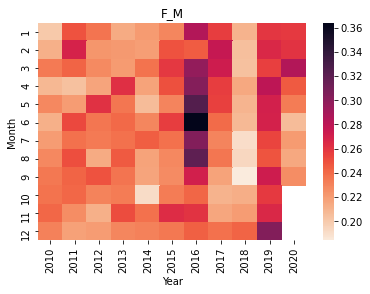

In [225]:
table = pd.pivot_table(df_ma, values=df_ma.columns[6], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(df_ma.columns[6])

Text(0.5, 1.0, 'Sludge_age')

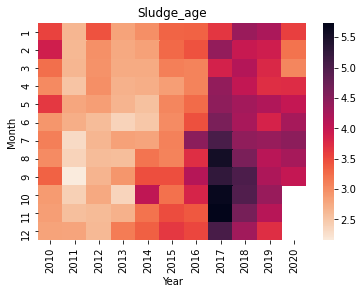

In [226]:
table = pd.pivot_table(df_ma, values=df_ma.columns[7], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(df_ma.columns[7])

In [227]:
sludge_age = df.iloc[:, np.r_[2: 4]]
F_M = df.iloc[:, np.r_[0: 2]]

In [228]:
F_M

,F_M - A,F_M - B
Date,,
2010-01-01,0.18,0.17
2010-01-02,0.18,0.17
2010-01-03,0.18,0.17
2010-01-04,0.18,0.17
2010-01-05,0.23,0.23
...,...,...
2020-09-11,0.26,0.26
2020-09-12,0.21,0.22
2020-09-13,0.24,0.24


In [229]:
sludge_age

,Sludge Age - A,Sludge Age - B
Date,,
2010-01-01,3.78,3.04
2010-01-02,3.78,3.04
2010-01-03,3.78,3.18
2010-01-04,3.40,3.18
2010-01-05,3.40,2.70
...,...,...
2020-09-11,3.54,3.37
2020-09-12,3.70,3.91
2020-09-13,3.60,3.76


<AxesSubplot:xlabel='Date'>

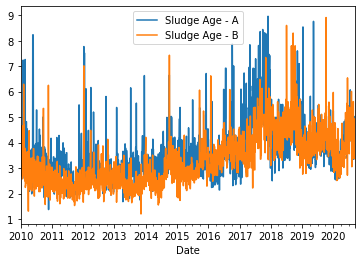

In [230]:
sludge_age.plot()

<AxesSubplot:xlabel='Date'>

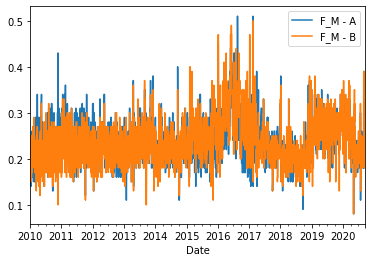

In [231]:
F_M.plot()

In [232]:
sludge_age_ma = sludge_age.rolling(5, center=True).mean()
F_M_ma = F_M.rolling(5, center=True).mean()

<AxesSubplot:xlabel='Date'>

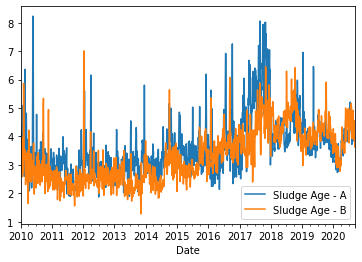

In [233]:
sludge_age_ma.plot()

<AxesSubplot:xlabel='Date'>

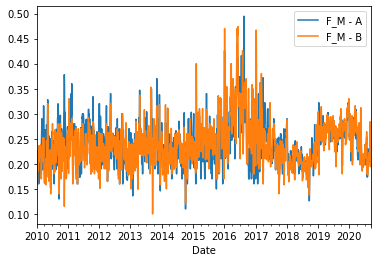

In [234]:
F_M_ma.plot()